In [ ]:
!kaggle datasets download -d ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 98% 442M/451M [00:03<00:00, 68.7MB/s]
100% 451M/451M [00:03<00:00, 120MB/s] 


In [ ]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile("cremad.zip", "r") as zip_ref:
    zip_ref.extractall("CREMA-D")

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
import os

# Path to extracted audio files
dataset_path = "CREMA-D/AudioWAV/"

# Get all .wav files
wav_files = [f for f in os.listdir(dataset_path) if f.endswith(".wav")]

print(f"Found {len(wav_files)} WAV files")
print("Sample files:", wav_files[:5])

Found 7442 WAV files
Sample files: ['1084_TAI_FEA_XX.wav', '1027_DFA_NEU_XX.wav', '1058_IWL_ANG_XX.wav', '1063_IWL_SAD_XX.wav', '1046_IEO_HAP_LO.wav']


# Importing libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf
import librosa # Audio processing library
from IPython.display import Audio # Displays audio
import warnings
warnings.filterwarnings('ignore')

## Audio Signal Visualization

In [ ]:
file_name = "CREMA-D/AudioWAV/1015_TSI_FEA_XX.wav"
y, sr = librosa.load(file_name, sr=22050)

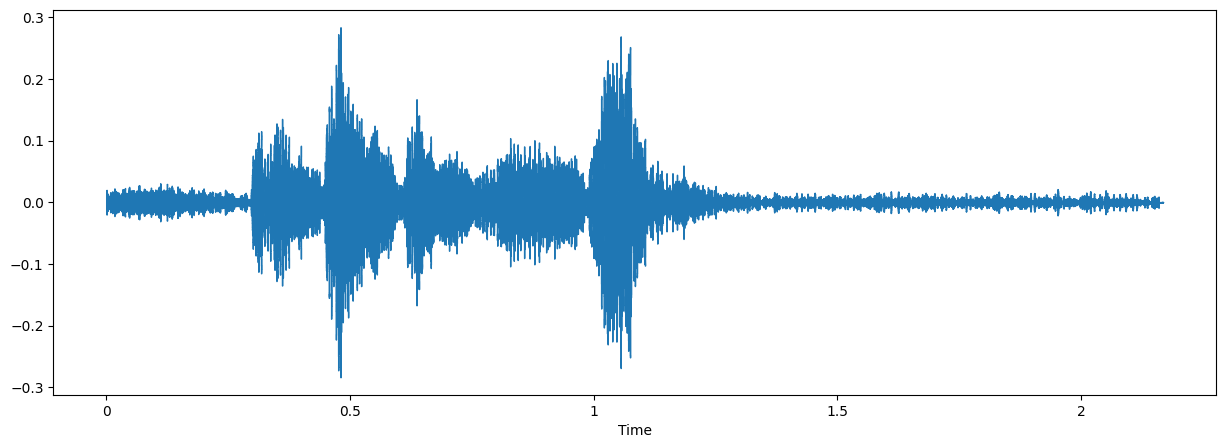

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)

In [ ]:
Audio(data=y, rate=sr)

## Visualizing Using Plotly

In [ ]:
time = [i / sr for i in range(len(y))] # Time axis: dividing sample indices by sr
fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=y)) # Scatter plot trace (audio vs. time)
fig.update_layout(
    title=f'{file_name}',
    xaxis_title='Time',
    yaxis_title='Amplitude'
)
fig.show()

## Mel Spectogram

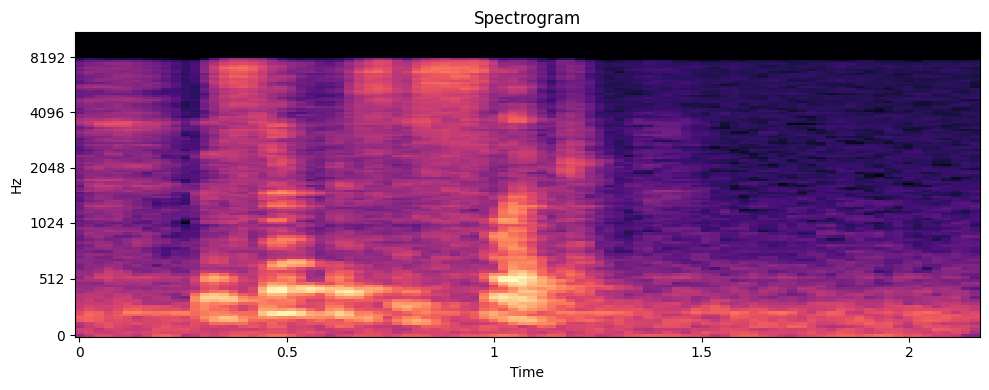

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=y,sr=sr) # Computes the mel spectogram
spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max) # Converts the power spectogram to dB (log scale)
plt.figure(figsize=(10,4))
librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel') # Display spectogram
plt.title("Spectrogram")
plt.tight_layout()
plt.show()

In [ ]:
time = np.linspace(0, len(y) / sr, spectrogram_db.shape[1]) # Time array: start-0, stop-total_duration, resizing to make no. of columns in spectogram and no. of points same
mel_frequencies = librosa.mel_frequencies(n_mels=128, fmin=0, fmax=sr / 2)

In [ ]:
fig = go.Figure(
    data=go.Heatmap(
        z = spectrogram_db, # Spectogram data
        x = time,
        y = mel_frequencies,
        colorscale='Plasma'
    )
)

fig.update_layout(
    title='Mel Spectrogram',
    xaxis_title='Time (seconds)',
    yaxis_title='Frequency (Hz)',
    yaxis=dict(type='log') # Using log scale
)

fig.show()

# Preprocessing

In [ ]:
DATASET_PATH = "CREMA-D/AudioWAV/"
OUTPUT_PATH = "CREMA-D-Spectrograms/"

# Ensure output directory exists
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

# Function to extract Mel spectrogram
def audio_to_melspectrogram(file_path, save_path):
    y, sr = librosa.load(file_path, sr=16000)  # Load audio
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale

    # Save as RGB image (VGG16 expects 3 channels)
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis=None, y_axis=None)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Convert all WAV files
for file in os.listdir(DATASET_PATH):
    if file.endswith(".wav"):
        emotion_label = file.split("_")[2]  # Extract emotion
        output_file = os.path.join(OUTPUT_PATH, f"{emotion_label}_{file.replace('.wav', '.png')}")
        audio_to_melspectrogram(os.path.join(DATASET_PATH, file), output_file)

print("Mel spectrograms created successfully!")

Mel spectrograms created successfully!


In [ ]:
import os
import shutil

DATASET_PATH = "CREMA-D-Spectrograms/"

# Define emotion mapping based on file names
EMOTIONS = ["Happy", "Sad", "Angry", "Neutral", "Disgust", "Fear"]

# Create subdirectories if they don’t exist
for emotion in EMOTIONS:
    os.makedirs(os.path.join(DATASET_PATH, emotion), exist_ok=True)

# Move files into respective emotion folders
for file in os.listdir(DATASET_PATH):
    if file.endswith(".png"):  # Ensure it's an image file
        label = file.split("_")[0]  # Extract label from filename
        if label in EMOTIONS:
            shutil.move(os.path.join(DATASET_PATH, file), os.path.join(DATASET_PATH, label, file))

print("Images sorted into class folders!")


Images sorted into class folders!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # 80% Training, 20% Validation
)

# Load Training Data
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Data loaded successfully!")


Found 0 images belonging to 6 classes.
Found 0 images belonging to 6 classes.
Data loaded successfully!


In [ ]:
import os

DATASET_PATH = "CREMA-D-Spectrograms/"  # Make sure this is correct
print("Files in dataset path:", os.listdir(DATASET_PATH))


Files in dataset path: ['ANG_1086_IEO_ANG_MD.png', 'HAP_1023_ITS_HAP_XX.png', 'DIS_1021_ITH_DIS_XX.png', 'SAD_1051_TIE_SAD_XX.png', 'FEA_1022_IOM_FEA_XX.png', 'DIS_1089_TIE_DIS_XX.png', 'FEA_1010_TIE_FEA_XX.png', 'SAD_1002_ITS_SAD_XX.png', 'NEU_1087_IWW_NEU_XX.png', 'SAD_1082_IWL_SAD_XX.png', 'DIS_1065_ITH_DIS_XX.png', 'HAP_1040_TIE_HAP_XX.png', 'FEA_1018_MTI_FEA_XX.png', 'DIS_1026_MTI_DIS_XX.png', 'FEA_1015_DFA_FEA_XX.png', 'HAP_1063_IEO_HAP_LO.png', 'FEA_1080_TAI_FEA_XX.png', 'ANG_1053_TAI_ANG_XX.png', 'HAP_1013_TSI_HAP_XX.png', 'FEA_1090_TSI_FEA_XX.png', 'HAP_1077_IEO_HAP_MD.png', 'HAP_1043_TSI_HAP_XX.png', 'ANG_1027_IWL_ANG_XX.png', 'DIS_1001_MTI_DIS_XX.png', 'DIS_1058_IEO_DIS_MD.png', 'FEA_1083_IOM_FEA_XX.png', 'SAD_1014_IWL_SAD_XX.png', 'ANG_1079_IEO_ANG_LO.png', 'NEU_1006_DFA_NEU_XX.png', 'HAP_1012_ITS_HAP_XX.png', 'ANG_1087_ITH_ANG_XX.png', 'ANG_1001_IEO_ANG_LO.png', 'FEA_1056_IWW_FEA_XX.png', 'DIS_1009_IOM_DIS_XX.png', 'ANG_1063_IOM_ANG_XX.png', 'SAD_1076_IWW_SAD_XX.png', 'FEA

In [ ]:
for file in os.listdir(DATASET_PATH):
    if not file.endswith((".png", ".jpg", ".jpeg")):
        print("Invalid file:", file)


Invalid file: Disgust
Invalid file: Sad
Invalid file: Neutral
Invalid file: Angry
Invalid file: Fear
Invalid file: Happy


In [ ]:
import os

DATASET_PATH = "CREMA-D-Spectrograms/"  # Ensure this is the correct path

if os.path.exists(DATASET_PATH):
    print("Dataset folder exists!")
    print("Files in dataset path:", os.listdir(DATASET_PATH))
else:
    print("Dataset path does NOT exist! Check the path.")


Dataset folder exists!
Files in dataset path: ['ANG_1086_IEO_ANG_MD.png', 'HAP_1023_ITS_HAP_XX.png', 'DIS_1021_ITH_DIS_XX.png', 'SAD_1051_TIE_SAD_XX.png', 'FEA_1022_IOM_FEA_XX.png', 'DIS_1089_TIE_DIS_XX.png', 'FEA_1010_TIE_FEA_XX.png', 'SAD_1002_ITS_SAD_XX.png', 'NEU_1087_IWW_NEU_XX.png', 'SAD_1082_IWL_SAD_XX.png', 'DIS_1065_ITH_DIS_XX.png', 'HAP_1040_TIE_HAP_XX.png', 'FEA_1018_MTI_FEA_XX.png', 'DIS_1026_MTI_DIS_XX.png', 'FEA_1015_DFA_FEA_XX.png', 'HAP_1063_IEO_HAP_LO.png', 'FEA_1080_TAI_FEA_XX.png', 'ANG_1053_TAI_ANG_XX.png', 'HAP_1013_TSI_HAP_XX.png', 'FEA_1090_TSI_FEA_XX.png', 'HAP_1077_IEO_HAP_MD.png', 'HAP_1043_TSI_HAP_XX.png', 'ANG_1027_IWL_ANG_XX.png', 'DIS_1001_MTI_DIS_XX.png', 'DIS_1058_IEO_DIS_MD.png', 'FEA_1083_IOM_FEA_XX.png', 'SAD_1014_IWL_SAD_XX.png', 'ANG_1079_IEO_ANG_LO.png', 'NEU_1006_DFA_NEU_XX.png', 'HAP_1012_ITS_HAP_XX.png', 'ANG_1087_ITH_ANG_XX.png', 'ANG_1001_IEO_ANG_LO.png', 'FEA_1056_IWW_FEA_XX.png', 'DIS_1009_IOM_DIS_XX.png', 'ANG_1063_IOM_ANG_XX.png', 'SAD_107

In [ ]:
import os
import shutil

DATASET_PATH = "CREMA-D-Spectrograms/"

# Define emotion labels (modify if necessary)
EMOTIONS = ["Happy", "Sad", "Angry", "Neutral", "Disgust", "Fear"]

# Create subdirectories if they don't exist
for emotion in EMOTIONS:
    os.makedirs(os.path.join(DATASET_PATH, emotion), exist_ok=True)

# Move images into corresponding folders
for file in os.listdir(DATASET_PATH):
    if file.endswith((".png", ".jpg", ".jpeg")):  # Ensure it's an image
        for emotion in EMOTIONS:
            if f"_{emotion[:3].upper()}_" in file:  # Check if filename contains emotion tag
                shutil.move(os.path.join(DATASET_PATH, file), os.path.join(DATASET_PATH, emotion, file))
                break  # Move to next file after sorting

print("✅ Dataset structure fixed! Try reloading the data now.")


✅ Dataset structure fixed! Try reloading the data now.


In [ ]:
for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):
        print(f"{class_name}: {len(os.listdir(class_path))} images")


Disgust: 1271 images
Sad: 1271 images
Neutral: 1087 images
Angry: 1271 images
Fear: 1271 images
Happy: 1271 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data paths
DATASET_PATH = "CREMA-D-Spectrograms/"

# Data Augmentation to reduce overfitting
datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values
    validation_split=0.2, # 80% train, 20% validation
    rotation_range=15,    # Small rotations
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Load Train Data
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 5955 images belonging to 6 classes.
Found 1487 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)



In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Stop if no improvement
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)   # Reduce LR if plateau
]

# Load VGG16 without the top layer
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
for layer in base_model1.layers[-4:]:  # Unfreezing last 4 layers
    layer.trainable = True

# Add custom layers
x = Flatten()(base_model1.output)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Dropout to reduce overfitting
x = Dense(128, activation='relu',kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x) # 6 classes for emotions

# Create model
model1 = Model(inputs=base_model1.input, outputs=x)

# Compile
model1.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,845,766 (64.26 MB)

 Trainable params: 16,845,766 (64.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
traininghistory=model1.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 100s 407ms/step - accuracy: 0.2097 - loss: 2.5959 - val_accuracy: 0.3705 - val_loss: 2.1857 - learning_rate: 1.0000e-05
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 58s 310ms/step - accuracy: 0.3147 - loss: 2.2373 - val_accuracy: 0.4183 - val_loss: 2.0801 - learning_rate: 1.0000e-05
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 57s 305ms/step - accuracy: 0.3523 - loss: 2.1398 - val_accuracy: 0.4398 - val_loss: 2.0064 - learning_rate: 1.0000e-05
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 59s 314ms/step - accuracy: 0.3888 - loss: 2.0529 - val_accuracy: 0.4082 - val_loss: 1.9856 - learning_rate: 1.0000e-05
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 59s 317ms/step - accuracy: 0.4016 - loss: 2.0050 - val_accuracy: 0.4506 - val_loss: 1.9139 - learning_rate: 1.0000e-05
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 60s 319ms/step - accuracy: 0.4276 - loss: 1.9463 - val_accuracy: 0.4654 - val_loss: 1.8522 - learning_rate: 1.0000e-05
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 60s 3

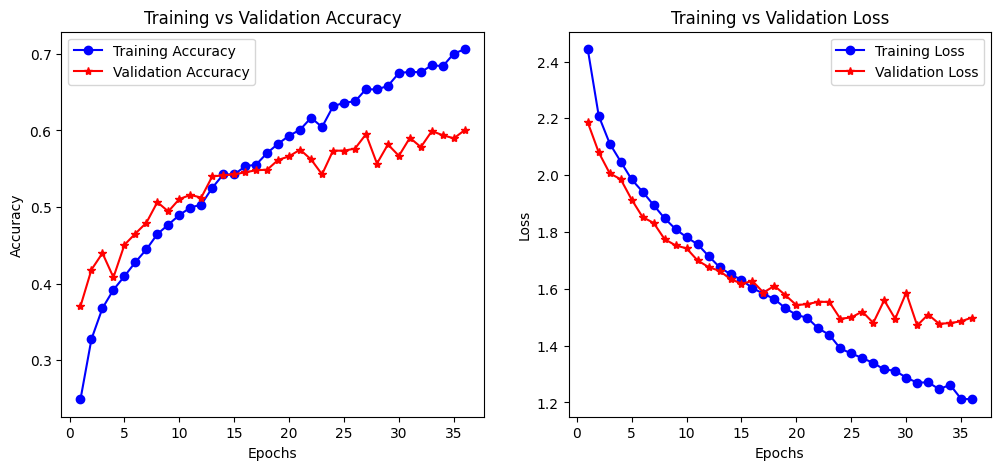

In [ ]:
 import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_history(history):
    # Extract accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

# Call after training the model
plot_history(traininghistory)

In [ ]:
traininghistory.history # Returns a dictionary: accuracy, loss, val_acc, val_loss

{'accuracy': [0.24903441965579987,
  0.3276238441467285,
  0.36792612075805664,
  0.39193955063819885,
  0.4095717966556549,
  0.4280436635017395,
  0.44466835260391235,
  0.46465155482292175,
  0.47707808017730713,
  0.4895046055316925,
  0.4992443323135376,
  0.5032745599746704,
  0.5251049399375916,
  0.5425692796707153,
  0.5425692796707153,
  0.553148627281189,
  0.5554995536804199,
  0.570612907409668,
  0.5827035903930664,
  0.5931150317192078,
  0.6010075807571411,
  0.6166247129440308,
  0.6045340299606323,
  0.6314021944999695,
  0.6364399790763855,
  0.6379513144493103,
  0.6539042592048645,
  0.6535684466362,
  0.6582703590393066,
  0.6750629544258118,
  0.6765742897987366,
  0.676070511341095,
  0.6853064894676208,
  0.6839630603790283,
  0.7004198431968689,
  0.7061293125152588],
 'loss': [2.4432809352874756,
  2.2086710929870605,
  2.111318826675415,
  2.0477030277252197,
  1.984753131866455,
  1.9414416551589966,
  1.8946465253829956,
  1.8480112552642822,
  1.810132741

In [ ]:
model1.save("ser_model.h5")

In [ ]:
model = tf.keras.models.load_model('model.h5')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,845,768 (64.26 MB)

 Trainable params: 16,845,766 (64.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Model Evaluation

In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc:.2f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.5798 - loss: 1.5131
Validation Accuracy: 0.60


In [ ]:
loss, acc = model.evaluate(train_generator)
print(f"Training Accuracy: {acc:.2f}")

187/187 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - accuracy: 0.7213 - loss: 1.1335
Training Accuracy: 0.73


In [ ]:
import json

In [ ]:
with open('traininghist.json','w') as f:
    json.dump(traininghistory.history,f) # Saves training history as a JSON file

In [ ]:
with open("traininghist.json",'r') as json_file:
    traininghistory_data = json.load(json_file) # Loads the saved training history JSON file

# Predict on Valdidation Set

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predicted labels
y_true = val_generator.classes  # True labels from validation generator
y_pred_probs = model.predict(val_generator)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get class labels
class_labels = list(val_generator.class_indices.keys())

47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step


# Confusion Matrix

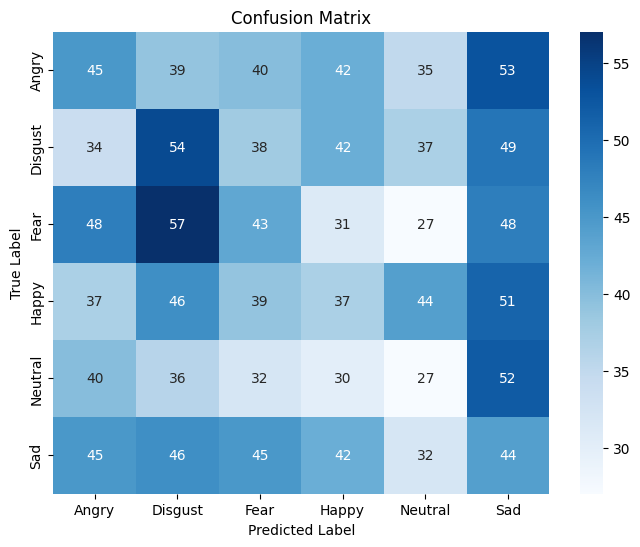

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:
               precision    recall  f1-score   support

       Angry       0.18      0.18      0.18       254
     Disgust       0.19      0.21      0.20       254
        Fear       0.18      0.17      0.18       254
       Happy       0.17      0.15      0.15       254
     Neutral       0.13      0.12      0.13       217
         Sad       0.15      0.17      0.16       254

    accuracy                           0.17      1487
   macro avg       0.17      0.17      0.17      1487
weighted avg       0.17      0.17      0.17      1487



In [ ]:
from google.colab import files

# Save the trained model
model.save("ser_model.h5")

# Download the model to your computer
files.download("ser_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>